In [80]:
import numpy as np
import pandas as pd

## Loading data

In [81]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [82]:
df.shape

(1338, 7)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [87]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [88]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [89]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [90]:
df.corr()

<ipython-input-90-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [91]:
df.corr()['charges'].sort_values(ascending=False)

<ipython-input-91-60c0ddbac433>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['charges'].sort_values(ascending=False)


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## Data Visualization

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-93-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

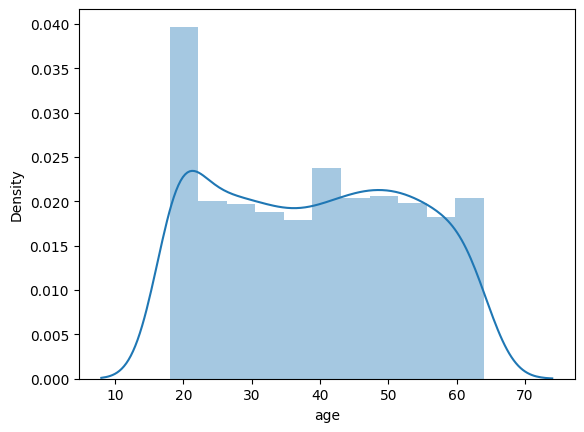

In [93]:
sns.distplot(df['age'])

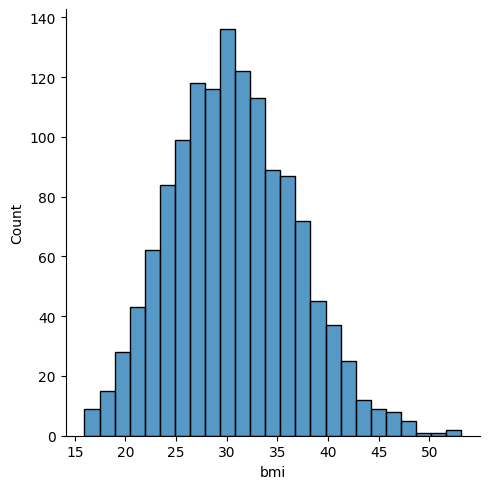

In [94]:
sns.displot(df['bmi'])

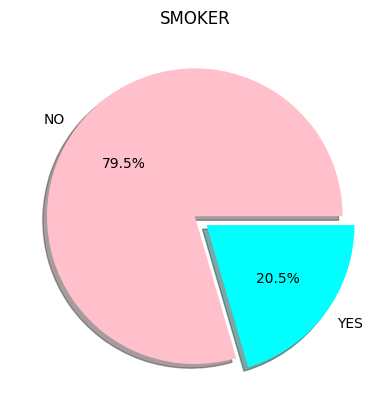

In [95]:
plt.pie(df['smoker'].value_counts(),[0,0.1],labels=['NO','YES'],autopct='%1.1f%%',shadow=True,colors=['pink','cyan'])
plt.title('SMOKER')
plt.show()

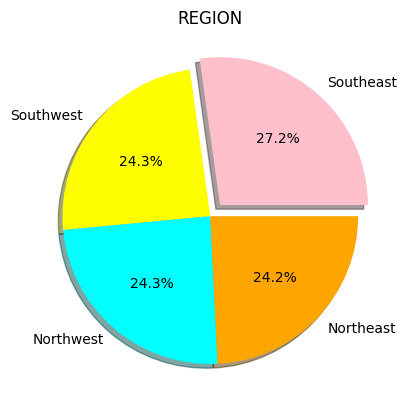

In [96]:
plt.pie(df['region'].value_counts(),[0.1,0,0,0],labels=['Southeast','Southwest','Northwest','Northeast'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow','cyan','orange'])
plt.title('REGION')
plt.show()

Text(0.5, 1.0, 'Count of region-wise')

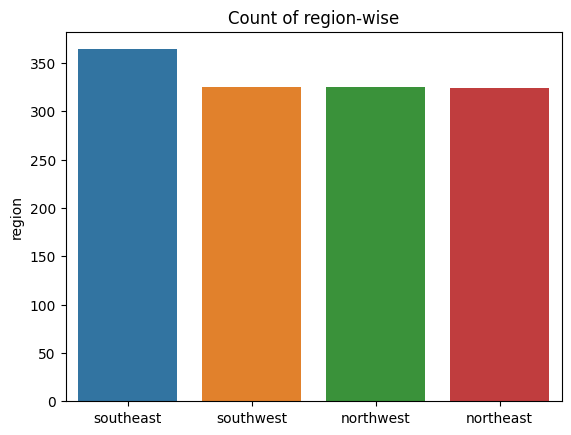

In [97]:
sns.barplot(x=df['region'].value_counts().index,y=df['region'].value_counts())
plt.title('Count of region-wise')

Text(0.5, 1.0, 'Count of sex-wise')

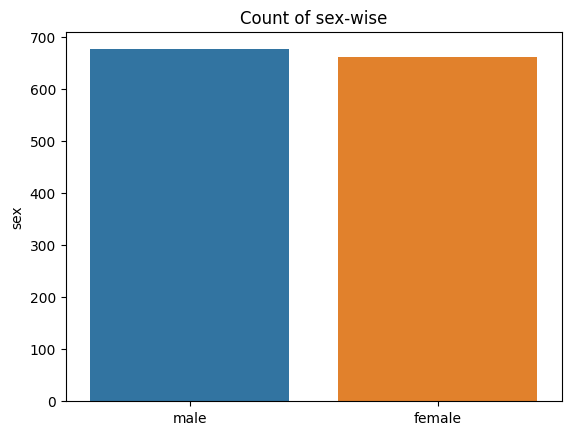

In [98]:
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts())
plt.title('Count of sex-wise')

<Axes: xlabel='age', ylabel='charges'>

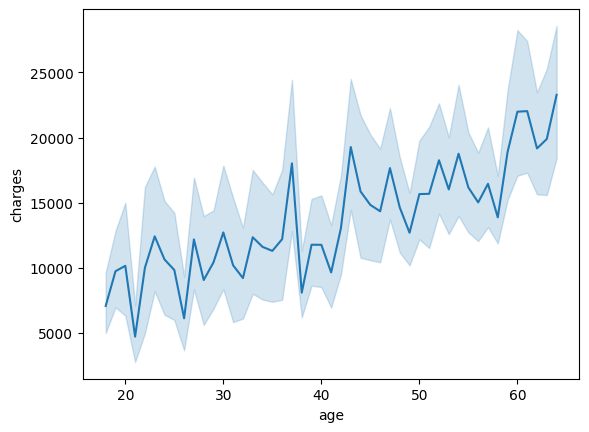

In [99]:
sns.lineplot(x=df['age'],y=df['charges'])

<Axes: xlabel='age', ylabel='bmi'>

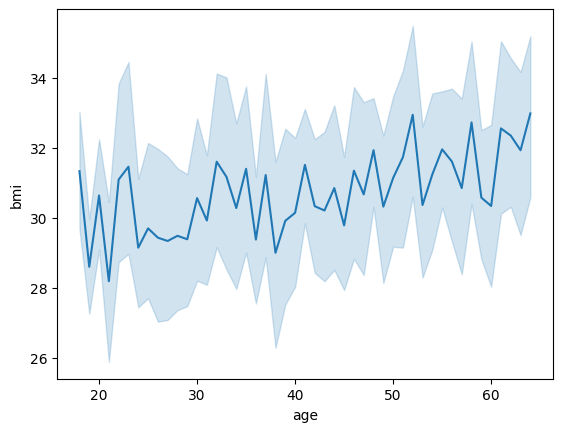

In [100]:
sns.lineplot(x=df['age'],y=df['bmi'])

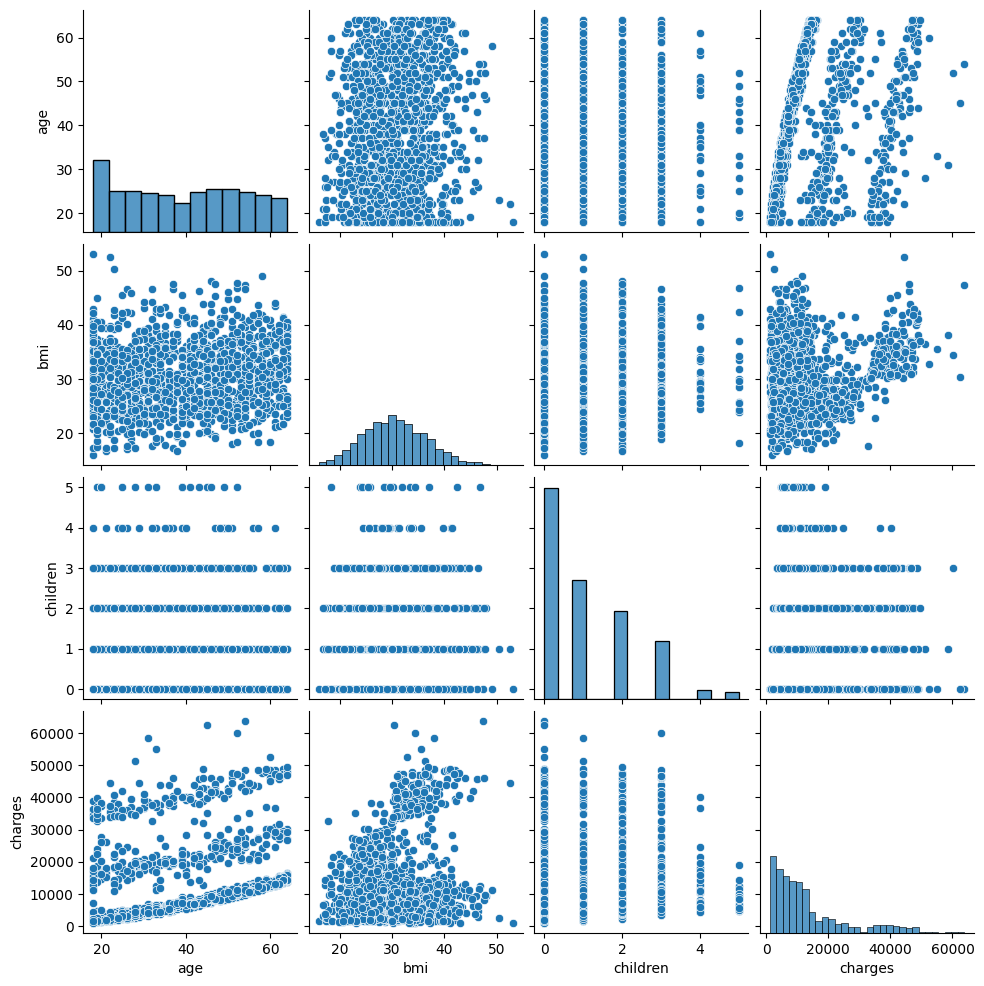

In [101]:
sns.pairplot(df)

<ipython-input-102-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

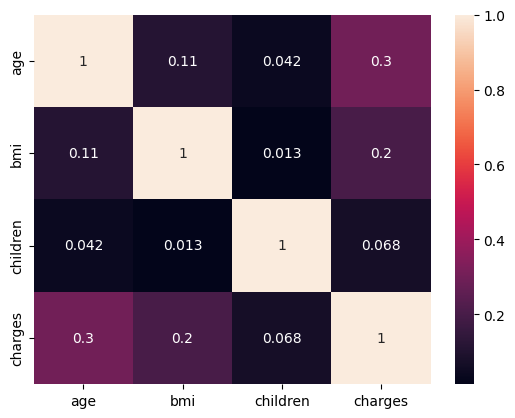

In [102]:
sns.heatmap(df.corr(),annot=True)

## Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()

In [105]:
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])

In [106]:
df['smoker'] = le.fit_transform(df['smoker'])

In [107]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## x and y split

In [108]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [109]:
x = df.drop(columns = ['charges'],axis = 1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [111]:
scale = MinMaxScaler()

In [112]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333


In [113]:
joblib.dump(scale,'scale_model.joblib')

['scale_model.joblib']

## Train test split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [36]:
x_train.shape,y_train.shape

((936, 6), (936,))

In [37]:
x_test.shape,y_test.shape

((402, 6), (402,))

In [38]:
x_train.head()

,age,sex,bmi,children,smoker,region
1163,0.000000,0.0,0.329701,0.0,0.0,0.000000
196,0.456522,0.0,0.453054,0.0,0.0,1.000000
438,0.739130,0.0,0.828356,1.0,0.0,0.666667
183,0.565217,0.0,0.281141,0.0,0.0,0.333333
1298,0.326087,1.0,0.309255,0.4,0.0,0.333333


## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred_lin_reg = lin_reg.predict(x_test)
y_pred_lin_reg

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [43]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_lin_reg})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,11051.549098
610,8547.69130,9821.281107
569,45702.02235,37867.572209
1034,12950.07120,16125.705792
198,9644.25250,6920.271325


### Evaluation

In [44]:
from sklearn import metrics

In [45]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_lin_reg))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_lin_reg))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lin_reg)))

R2-score:  0.7911113876316933
MSE score:  33311355.281859975
RMSE score:  5771.599022962352


## Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dec_tree = DecisionTreeRegressor()

In [48]:
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
y_pred_dec_tree = dec_tree.predict(x_test)

In [50]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_dec_tree})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,9748.91060
610,8547.69130,8930.93455
569,45702.02235,44202.65360
1034,12950.07120,12741.16745
198,9644.25250,9855.13140


### Evaluation

In [51]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_dec_tree))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_dec_tree))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dec_tree)))

R2-score:  0.6967813976295422
MSE score:  48354108.33129672
RMSE score:  6953.711838385074


## Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rand_for = RandomForestRegressor(n_estimators=100,random_state=42)

In [54]:
rand_for.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_pred_rand_for = rand_for.predict(x_test)

In [56]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_rand_for})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,10182.071308
610,8547.69130,9437.676876
569,45702.02235,44912.350968
1034,12950.07120,13215.293649
198,9644.25250,9646.042258


### Evaluation

In [57]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_rand_for))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_rand_for))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rand_for)))

R2-score:  0.8601787354100061
MSE score:  22297222.275113866
RMSE score:  4721.993464111727


## Support Vector Regression

In [58]:
from sklearn.svm import SVR

In [59]:
svr = SVR()

In [60]:
svr.fit(x_train,y_train)

SVR()

In [61]:
y_pred_svr = svr.predict(x_test)

In [62]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_svr})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,9579.579449
610,8547.69130,9556.745915
569,45702.02235,9673.117402
1034,12950.07120,9614.615079
198,9644.25250,9583.861719


### Evaluation

In [63]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_svr))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_svr))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

R2-score:  -0.08300170170295496
MSE score:  172705702.08335435
RMSE score:  13141.754147881262


## Gradient Boosting regression

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
grad_boost = GradientBoostingRegressor()

In [66]:
grad_boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [67]:
y_pred_grad_boost = grad_boost.predict(x_test)

In [68]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_grad_boost})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,11975.856779
610,8547.69130,9941.161113
569,45702.02235,47143.160263
1034,12950.07120,14008.240694
198,9644.25250,9722.602158


### Evaluation

In [69]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_grad_boost))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_grad_boost))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_grad_boost)))

R2-score:  0.8845050508566392
MSE score:  18417917.762751937
RMSE score:  4291.61015968971


## K-Nearest Neighbors Regression

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
k_neighbor = KNeighborsRegressor()

In [72]:
k_neighbor.fit(x_train,y_train)

KNeighborsRegressor()

In [73]:
y_pred_k_neighbor = k_neighbor.predict(x_test)

In [74]:
pred_charges = pd.DataFrame({'Actual charges':y_test,'Predicted charges':y_pred_k_neighbor})
pred_charges.head()

,Actual charges,Predicted charges
578,9724.53000,9071.269400
610,8547.69130,8242.239640
569,45702.02235,47033.599964
1034,12950.07120,11605.427900
198,9644.25250,11324.459740


## Evaluation

In [75]:
print('R2-score: ',metrics.r2_score(y_test,y_pred_k_neighbor))
print('MSE score: ',metrics.mean_squared_error(y_test,y_pred_k_neighbor))
print('RMSE score: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_k_neighbor)))

R2-score:  0.8158094077688209
MSE score:  29372775.221326165
RMSE score:  5419.66560050767


## Conclusion

In [76]:
models = ['Linear Regression','Decision Tree Regression','Random Forest Regression','Support Vector REgression','Gradient Boosting Regression','KNearest Neighbor Regression']
r2_score = [metrics.r2_score(y_test,y_pred_lin_reg),metrics.r2_score(y_test,y_pred_dec_tree),metrics.r2_score(y_test,y_pred_rand_for),metrics.r2_score(y_test,y_pred_svr),metrics.r2_score(y_test,y_pred_grad_boost),metrics.r2_score(y_test,y_pred_k_neighbor)]

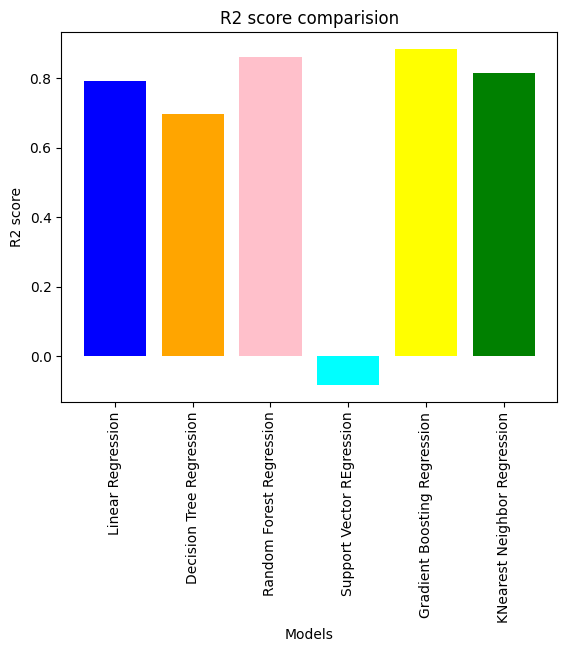

In [77]:
colors = ['blue','orange','pink','cyan','yellow','green']
plt.bar(models,r2_score,color=colors)
plt.xlabel('Models')
plt.ylabel('R2 score')
plt.title('R2 score comparision')
plt.xticks(rotation='vertical')
plt.show()

### So, it can be concluded that among all the models used above, Gradient Boosting is coming out ot be most accurate

## Dumping best model

In [78]:
import pickle

In [79]:
with open('insurance_model.pkl', 'wb') as model_file:
    pickle.dump(grad_boost, model_file)